# Code can be rewritten without loops/ with clean vector calculus ops

# Current code based on Metpy 1.5.1

In [1]:
import os
os.system('conda list metpy')

# packages in environment at /home/lab_hardik/my_conda:
#
# Name                    Version                   Build  Channel
metpy                     1.5.1              pyhd8ed1ab_0    conda-forge


0

https://unidata.github.io/python-training/workshop/MetPy_Advanced/qg-analysis/
https://github.com/miniufo/xinvert/blob/master/docs/source/notebooks/11_Omega_equation.ipynb

In [2]:
import xarray as xr, numpy as np, pandas as pd, dask, netCDF4
import cartopy.crs as ccrs 
import cartopy.feature as cfeature

import matplotlib.pyplot as plt, matplotlib.animation as animation, matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from matplotlib.gridspec import GridSpec

from datetime import datetime as dt, time, timedelta

import gc
dask.config.set({"array.slicing.split_large_chunks": True})

import metpy.calc as mpcalc
import metpy.constants as mpconstants
from metpy.units import units

/home/lab_hardik/my_conda/lib/python3.9/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/lab_hardik/my_conda/lib/python3.9/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
/home/lab_hardik/my_conda/lib/python3.9/site-packages/paramiko/transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [3]:
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
from shapely.geometry import Point
import geopandas as gpd
import shapefile as shp
import seaborn as sns


In [5]:
nibox_lon = [68, 78]
nibox_lat = [24, 31]

year_min = 1980; year_max = 2022

In [6]:
def day_sort(s):
    return int(s.split('_')[-1].split('.')[0])

def mon_sort(s):
    return int(s.split('_')[-2])

def year_sort(s):
    return int(s.split('_')[-3])


In [7]:
dir_omega_data = '/home/data/lab_hardik/heatwaves/ERA5/analyses/RWP/qg_omega/data/'
# xr.open_dataset('metpy_forcing_xinv_omega_2010_03_02.nc').time.data


In [8]:
os.chdir(dir_omega_data)

In [9]:
dir_w = '/home/lab_hardik/daily_means/vertical_velocity/'
w_files = [s for s in os.listdir(dir_w) if '.nc' in s]
# w_files = [s for s in w_files if (int(s.split('_')[-3]) in [2010,2016]) and (int(s.split('_')[-2]) in [3,4])]
w_files = [
    s for s in w_files if (
        int(s.split('_')[-3]) in range(year_min, year_max+1) 
#                            and int(s.split('_')[-3]) != 2016
    ) 
           and (int(s.split('_')[-2]) in [3,4])]

print(len(w_files))
os.chdir(dir_w)

ds_era5_omega = xr.open_mfdataset(w_files)
ds_era5_omega

2623


<xarray.Dataset>
Dimensions:        (isobaricInhPa: 23, latitude: 721, longitude: 1440,
                    date: 2623)
Coordinates:
    number         int64 0
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 125.0 100.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * date           (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
Data variables:
    w              (date, isobaricInhPa, latitude, longitude) float32 dask.array<chunksize=(1, 23, 721, 1440), meta=np.ndarray>

In [33]:
# shortcut for quick test - actually will have to do vertical average

# da_era5_omega1 = ds_era5_omega['w']\
# .sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
# .sel(isobaricInhPa = slice(900,600)).mean(['isobaricInhPa', 'latitude', 'longitude'])\
# .compute()


# da_era5_omega1

In [34]:
# xr.merge([da_xinv_omega, da_era5_omega]).plot.scatter(x='w', y='Omega')

In [10]:
ds_M = xr.open_dataset('/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/mass_wgts_1980_2022.nc')

In [11]:
ds_M

<xarray.Dataset>
Dimensions:        (latitude: 28, isobaricInhPa: 23, longitude: 40, date: 5246)
Coordinates:
  * latitude       (latitude) float64 24.0 24.25 24.5 24.75 ... 30.25 30.5 30.75
    number         int64 ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
  * longitude      (longitude) float64 68.0 68.25 68.5 ... 77.25 77.5 77.75
  * date           (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-06-30
Data variables:
    mass_wgts      (latitude, date, isobaricInhPa, longitude) float64 ...
    M              (latitude, date, isobaricInhPa, longitude) float64 ...

In [12]:
import sys
sys.path.insert(1, '/home/data/lab_hardik/udf/')

In [13]:
import custom_funcs
from custom_funcs import *

In [14]:
import importlib
importlib.reload(custom_funcs)
from custom_funcs import *

In [15]:
help(vert_MassAve_qty)

Help on function vert_MassAve_qty in module custom_funcs:

vert_MassAve_qty(M=<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*, qty=<xarray.DataArray ()>
array(nan), p_low=600, p_high=900, sp_ave=True, filt_ni=True)
    # mass weighted average of point qantity



In [41]:
## Use this for final relationship plot 

da_era5 = vert_MassAve_qty(
    M = ds_M['M']
    .sel(isobaricInhPa = slice(600,900), date = ds_M.date.dt.year.isin(range(year_min, year_max+1))
#         & (ds_M.date.dt.year != 2016)
         & ds_M.date.dt.month.isin([3,4]))
    .sortby('isobaricInhPa'), 
    
    qty = ds_era5_omega['w']
    .sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))
    .sel(isobaricInhPa = slice(900,600)).sortby('isobaricInhPa').compute(),
    
    p_low=600, p_high=900,
    filt_ni=False, sp_ave=True
)

In [42]:
# da_xinv_omega.sel(isobaricInhPa = [s for s in da_xinv_omega.isobaricInhPa.values if s in ds_M.isobaricInhPa.values*100])

In [43]:
da_era5

<xarray.DataArray (date: 2623)>
array([ 0.05939147,  0.00973917,  0.00787545, ...,  0.0185087 ,
        0.03208179, -0.02006459])
Coordinates:
  * date     (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
    number   int64 0
    step     timedelta64[ns] 00:00:00

## Xinv forcing - Full range of years

In [16]:
files = [s for s in os.listdir(dir_omega_data) if 'xinv_forcing_omega_' in s]
files = [
    s for s in files if int(s.split('_')[-2]) in [3,4] and len(s.split('_')[-2]) == 2 and 
    int(s.split('_')[-3]) in range(1980,2023) # and int(s.split('_')[-3]) != 2016
]

print(np.unique([s.split('_')[-3] for s in files]))
# files
files.sort(key = day_sort)
files.sort(key = mon_sort)
files.sort(key = year_sort)


['1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022']


In [17]:
len(files)

2608

In [18]:
len(np.unique(files))

2608

In [19]:
# xr.open_dataset(files[700]).date.values

In [20]:
os.chdir(dir_omega_data)
ds = xr.open_mfdataset(
    files,
    combine='nested',
    concat_dim='date'
).sortby('date')


In [21]:
len(ds.date.values)

2608

In [24]:
ds['date'].groupby(ds.date.dt.year).count()

<xarray.DataArray 'date' (year: 43)>
array([61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 46, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61])
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0
  * year     (year) int64 1980 1981 1982 1983 1984 ... 2018 2019 2020 2021 2022

In [53]:
# with ds['date'].groupby(ds.date).count() as a:
#     print(a.where(a==2, drop=True))

In [54]:
# # ds.sel(date =ds.date.dt.year==2016).date.values
# xr.open_dataset([s for s in files if '2016_04_27' in s][0])\
# .date.values

In [55]:
# [s for s in files if '2016_04_28' in s]

In [56]:
# file = files[0]
# datetime.datetime(
# int(file.split('_')[-3]), int(file.split('_')[-2]), int(file.split('_')[-1].split('.')[0])
# ) == \
# xr.open_dataset(file).date.values.astype('datetime64[s]').astype(datetime.datetime)

In [57]:
# xr.open_dataset("xinv_forcing_omega_2016_04_26.nc").date.values

In [58]:
# for file in [s for s in files if '2016' in s]:
#     dt_filename = datetime.datetime(
#         int(file.split('_')[-3]), int(file.split('_')[-2]), int(file.split('_')[-1].split('.')[0])
#     )
    
#     print(file)
#     print(dt_filename == xr.open_dataset(file).date.values.astype('datetime64[s]').astype(datetime.datetime))
    

In [25]:
print(list(ds.data_vars))

['F1', 'F2', 'FAll', 'FAll2', 'Omega', 'Omega_topo']


In [123]:
ds_qg = ds[['Omega_topo', 'Omega']]

ds_qg = ds_qg.sel(
    latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]), 
#     vertical = slice(60000, 90000)
)\
.compute()

In [91]:
# da1_2010
# ds1_2010.to_netcdf('/home/da1ta/lab_hardik/da1ily_means/metpy_xinv_2010_prmnsn_vertical_diagnosis.nc')

In [124]:
gc.collect()

28696

In [125]:
da1_xinv_omega = ds_qg['Omega_topo'].rename({'vertical':'isobaricInhPa'}).sortby('date')
da2_xinv_omega = ds_qg['Omega'].rename({'vertical':'isobaricInhPa'}).sortby('date')

da1_xinv_omega = da1_xinv_omega.assign_coords({'isobaricInhPa':da1_xinv_omega.isobaricInhPa/100})
da2_xinv_omega = da2_xinv_omega.assign_coords({'isobaricInhPa':da2_xinv_omega.isobaricInhPa/100})

da1_xinv_omega.isobaricInhPa

<xarray.DataArray 'isobaricInhPa' (isobaricInhPa: 23)>
array([ 100.,  125.,  150.,  175.,  200.,  225.,  250.,  300.,  400.,  500.,
        600.,  700.,  750.,  775.,  800.,  825.,  850.,  875.,  900.,  925.,
        950.,  975., 1000.])
Coordinates:
  * isobaricInhPa  (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
    number         int64 0
    step           timedelta64[ns] 00:00:00
    surface        float64 0.0

In [97]:
da_era5_w = \
ds_era5_omega['w']\
.sel(
    latitude=slice(nibox_lat[1], nibox_lat[0]), 
    longitude=slice(nibox_lon[0], nibox_lon[1]),
#     isobaricInhPa = slice(900, 600)
)\
.mean(['latitude','longitude']).sortby('isobaricInhPa')

da_era5_w = da_era5_w.persist()


In [126]:
da1_omega = da1_xinv_omega.mean(['latitude','longitude']).sortby('isobaricInhPa')
da2_omega = da2_xinv_omega.mean(['latitude','longitude']).sortby('isobaricInhPa')

da1_omega

<xarray.DataArray 'Omega_topo' (date: 2608, isobaricInhPa: 23)>
array([[ 0.        ,  0.00160312,  0.00031489, ...,  0.00302887,
         0.00223265,  0.00296341],
       [ 0.        , -0.00730584,  0.01521245, ..., -0.02525299,
        -0.01221086, -0.00229706],
       [ 0.        ,  0.00703572,  0.01681116, ..., -0.00828511,
        -0.00476767, -0.00330236],
       ...,
       [ 0.        , -0.00342115, -0.00028093, ..., -0.00704821,
        -0.00742476, -0.00205246],
       [ 0.        ,  0.00125068,  0.00393906, ..., -0.00063318,
        -0.00117466,  0.00107575],
       [ 0.        ,  0.00197107,  0.00738857, ..., -0.01346904,
        -0.00774595, -0.00168493]], dtype=float32)
Coordinates:
  * isobaricInhPa  (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
  * date           (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
    number         int64 0
    step           timedelta64[ns] 00:00:00
    surface        float64 0.0

In [99]:
df_exclusion_dates = pd.read_csv(
    '/home/data/lab_hardik/heatwaves/ERA5/analyses/DSE/processed_files/1980_2022_exclusion_dates.csv', 
    parse_dates=['date']
)


In [100]:
print(da_era5_w.date)

da_era5_w = da_era5_w.sel(date = ~da_era5_w.date.isin(df_exclusion_dates.date))
print(da_era5_w.date)


<xarray.DataArray 'date' (date: 2623)>
array(['1980-03-01T00:00:00.000000000', '1980-03-02T00:00:00.000000000',
       '1980-03-03T00:00:00.000000000', ..., '2022-04-28T00:00:00.000000000',
       '2022-04-29T00:00:00.000000000', '2022-04-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
  * date     (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
<xarray.DataArray 'date' (date: 2587)>
array(['1980-03-01T00:00:00.000000000', '1980-03-02T00:00:00.000000000',
       '1980-03-03T00:00:00.000000000', ..., '2022-04-28T00:00:00.000000000',
       '2022-04-29T00:00:00.000000000', '2022-04-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
  * date     (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30


In [128]:
print(da1_omega.date)

da1_omega = da1_omega.sel(date = ~da1_omega.date.isin(df_exclusion_dates.date))
print(da1_omega.date)


<xarray.DataArray 'date' (date: 2608)>
array(['1980-03-01T00:00:00.000000000', '1980-03-02T00:00:00.000000000',
       '1980-03-03T00:00:00.000000000', ..., '2022-04-28T00:00:00.000000000',
       '2022-04-29T00:00:00.000000000', '2022-04-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * date     (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0
<xarray.DataArray 'date' (date: 2572)>
array(['1980-03-01T00:00:00.000000000', '1980-03-02T00:00:00.000000000',
       '1980-03-03T00:00:00.000000000', ..., '2022-04-28T00:00:00.000000000',
       '2022-04-29T00:00:00.000000000', '2022-04-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * date     (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0


In [129]:
da2_omega = da2_omega.sel(date = ~da2_omega.date.isin(df_exclusion_dates.date))
print(da2_omega.date)


<xarray.DataArray 'date' (date: 2572)>
array(['1980-03-01T00:00:00.000000000', '1980-03-02T00:00:00.000000000',
       '1980-03-03T00:00:00.000000000', ..., '2022-04-28T00:00:00.000000000',
       '2022-04-29T00:00:00.000000000', '2022-04-30T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * date     (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0


In [130]:
ds_w_mst = xr.merge([da_era5_w, da1_omega, da2_omega])

In [131]:
ds_w_mst['lt_wgts'] = \
xr.where(
    (ds_w_mst.isobaricInhPa >= 600) & (ds_w_mst.isobaricInhPa <= 900), 
    (-1*(ds_w_mst.isobaricInhPa - ds_w_mst.isobaricInhPa.shift(isobaricInhPa=-1)))/300, 
    np.nan
)

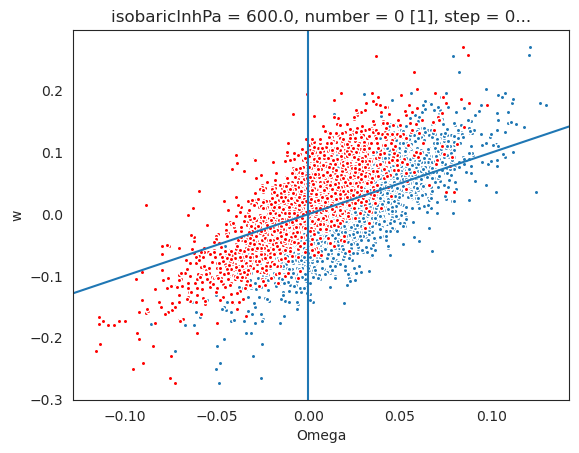

In [132]:
ds_w_mst.sel(isobaricInhPa = 600)\
.plot.scatter(x='Omega_topo', y='w', s=10)

ds_w_mst.sel(isobaricInhPa = 600)\
.plot.scatter(x='Omega', y='w', s=10, c='red')

plt.axline((0,0), slope=1)
plt.axvline(0)
plt.show()


In [134]:
df_lr_w = ds_w_mst.sel(isobaricInhPa = 600).to_pandas().dropna()

mlr(X = df_lr_w['Omega'].to_frame(), y = df_lr_w['w'], plot_coefs=False, standardize=False)

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     4633.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:36:21   Log-Likelihood:                 4270.8
No. Observations:                2314   AIC:                            -8538.
Df Residuals:                    2312   BIC:                            -8526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
               pvals  coeff  conf_lower  conf_higher
Omega   0.000000e+00   2.00        1.94         2.06
const  2.848171e-167   0.02      

(               pvals  coeff  conf_lower  conf_higher
 Omega   0.000000e+00   2.00        1.94         2.06
 const  2.848171e-167   0.02        0.02         0.03,
                pvals  coeff  conf_lower  conf_higher
 Omega   0.000000e+00   2.00        1.94         2.06
 const  2.848171e-167   0.02        0.02         0.03,
 date
 1998-04-02    0.006951
 1980-04-07    0.023528
 1994-03-05    0.048644
 1997-03-20    0.041882
 1985-03-03    0.105139
                 ...   
 1984-04-12    0.058477
 2004-04-04    0.034775
 2002-03-07   -0.056996
 1993-04-19    0.012480
 2006-03-26    0.068857
 Name: w, Length: 2314, dtype: float32)

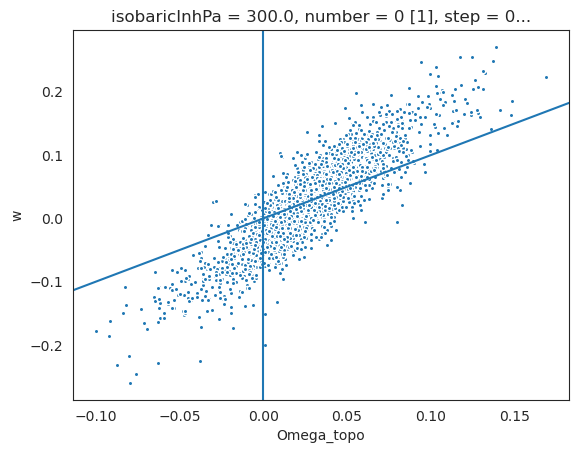

In [106]:
ds_w_mst.sel(isobaricInhPa = 300)\
.plot.scatter(x='Omega_topo', y='w', s=10)
plt.axline((0,0), slope=1)
plt.axvline(0)
plt.show()

In [111]:
ds_w_mst
# df_lr_w

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 23, date: 2587)
Coordinates:
  * isobaricInhPa  (isobaricInhPa) float64 100.0 125.0 150.0 ... 975.0 1e+03
  * date           (date) datetime64[ns] 1980-03-01 1980-03-02 ... 2022-04-30
    number         int64 0
    step           timedelta64[ns] 00:00:00
    surface        float64 0.0
Data variables:
    w              (date, isobaricInhPa) float32 dask.array<chunksize=(1, 23), meta=np.ndarray>
    Omega_topo     (date, isobaricInhPa) float32 0.0 0.001603 ... -0.001685
    lt_wgts        (isobaricInhPa) float64 nan nan nan nan ... nan nan nan nan

In [135]:
ds_w_mst.sel(isobaricInhPa = 300).to_pandas()

,isobaricInhPa,number,step,w,surface,Omega_topo,Omega,lt_wgts
date,,,,,,,,
1980-03-01,300.0,0,0 days,0.108319,0.0,0.103692,0.079678,NaN
1980-03-02,300.0,0,0 days,0.055712,0.0,0.087486,0.055747,NaN
1980-03-03,300.0,0,0 days,0.044388,0.0,0.048582,0.022222,NaN
1980-03-04,300.0,0,0 days,-0.016196,0.0,0.022978,0.004309,NaN
1980-03-05,300.0,0,0 days,-0.133015,0.0,-0.057150,-0.072374,NaN
...,...,...,...,...,...,...,...,...
2022-04-26,300.0,0,0 days,0.102733,0.0,0.037347,0.036631,NaN
2022-04-27,300.0,0,0 days,0.015984,0.0,0.008634,0.007659,NaN
2022-04-28,300.0,0,0 days,0.033589,0.0,0.007443,0.003978,NaN


In [152]:
for var in ['Omega', 'Omega_topo']:
    globals()[f"df_{var}_anal"] = pd.DataFrame(
        index = ds_w_mst.isobaricInhPa.data, # .astype(int) 
        columns = ['r2','coef']
    )

    plev = 300
    for plev in ds_w_mst.isobaricInhPa.data:
        df_lr_w = ds_w_mst[[var, 'w']].sel(isobaricInhPa = plev).to_pandas().dropna()

        results_df, results_df2, model, y_train = \
        mlr(X = df_lr_w[var].to_frame(), y = df_lr_w['w'], plot_coefs=False, standardize=False)

        globals()[f"df_{var}_anal"].loc[globals()[f"df_{var}_anal"].index == plev, "r2"] = model.rsquared_adj.round(2)
        globals()[f"df_{var}_anal"].loc[globals()[f"df_{var}_anal"].index == plev, "coef"] = results_df.loc[var, "coeff"]




/home/lab_hardik/my_conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide


                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 29 Sep 2025   Prob (F-statistic):                nan
Time:                        11:56:01   Log-Likelihood:                 8016.9
No. Observations:                2314   AIC:                        -1.603e+04
Df Residuals:                    2313   BIC:                        -1.603e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
              pvals  coeff  conf_lower  conf_higher
const  1.760060e-10    0.0         0.0          0.0
Omega           NaN    0.0         

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 1.102e+04
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:56:07   Log-Likelihood:                 4903.4
No. Observations:                2314   AIC:                            -9803.
Df Residuals:                    2312   BIC:                            -9791.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
               pvals  coeff  conf_lower  conf_higher
Omega   0.000000e+00   1.95        1.91         1.99
const  4.970291e-201   0.02      

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2681.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:56:11   Log-Likelihood:                 4430.3
No. Observations:                2314   AIC:                            -8857.
Df Residuals:                    2312   BIC:                            -8845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
               pvals  coeff  conf_lower  conf_higher
Omega   0.000000e+00   1.79        1.72         1.86
const  8.802917e-132   0.02      

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     403.4
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           7.79e-83
Time:                        11:56:16   Log-Likelihood:                 7790.1
No. Observations:                2314   AIC:                        -1.558e+04
Df Residuals:                    2312   BIC:                        -1.556e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
              pvals  coeff  conf_lower  conf_higher
Omega  7.793748e-83   0.93        0.84         1.02
const  5.753978e-89   0.00        0

/home/lab_hardik/my_conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide


                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 29 Sep 2025   Prob (F-statistic):                nan
Time:                        11:56:16   Log-Likelihood:                 8360.6
No. Observations:                2314   AIC:                        -1.672e+04
Df Residuals:                    2313   BIC:                        -1.671e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
               pvals  coeff  conf_lower  conf_higher
const  1.194442e-191    0.0         0.0          0.0
Omega            NaN    0.0      

/home/lab_hardik/my_conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide


                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 29 Sep 2025   Prob (F-statistic):                nan
Time:                        11:56:17   Log-Likelihood:                 8002.2
No. Observations:                2314   AIC:                        -1.600e+04
Df Residuals:                    2313   BIC:                        -1.600e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
                   pvals  coeff  conf_lower  conf_higher
const       1.950068e-09    0.0         0.0          0.0
Omega_topo           NaN 

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     8615.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:56:21   Log-Likelihood:                 4685.2
No. Observations:                2314   AIC:                            -9366.
Df Residuals:                    2312   BIC:                            -9355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
                    pvals  coeff  conf_lower  conf_higher
Omega_topo   0.000000e+00   1.90        1.86         1.94
const       4.731354e-1

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2480.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:56:25   Log-Likelihood:                 4390.4
No. Observations:                2314   AIC:                            -8777.
Df Residuals:                    2312   BIC:                            -8765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
                    pvals  coeff  conf_lower  conf_higher
Omega_topo   0.000000e+00   1.61        1.55         1.67
const       7.810295e-1

                            OLS Regression Results                            
Dep. Variable:                      w   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     6554.
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:56:29   Log-Likelihood:                 9173.1
No. Observations:                2314   AIC:                        -1.834e+04
Df Residuals:                    2312   BIC:                        -1.833e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
Index(['pvals', 'coeff', 'conf_lower', 'conf_higher'], dtype='object')
                    pvals  coeff  conf_lower  conf_higher
Omega_topo   0.000000e+00   0.77        0.75         0.79
const       1.540245e-1

In [203]:
df_Omega_anal.index

Index([ 100.0,  125.0,  150.0,  175.0,  200.0,  225.0,  250.0,  300.0,  400.0,
        500.0,  600.0,  700.0,  750.0,  775.0,  800.0,  825.0,  850.0,  875.0,
        900.0,  925.0,  950.0,  975.0, 1000.0],
      dtype='float64')

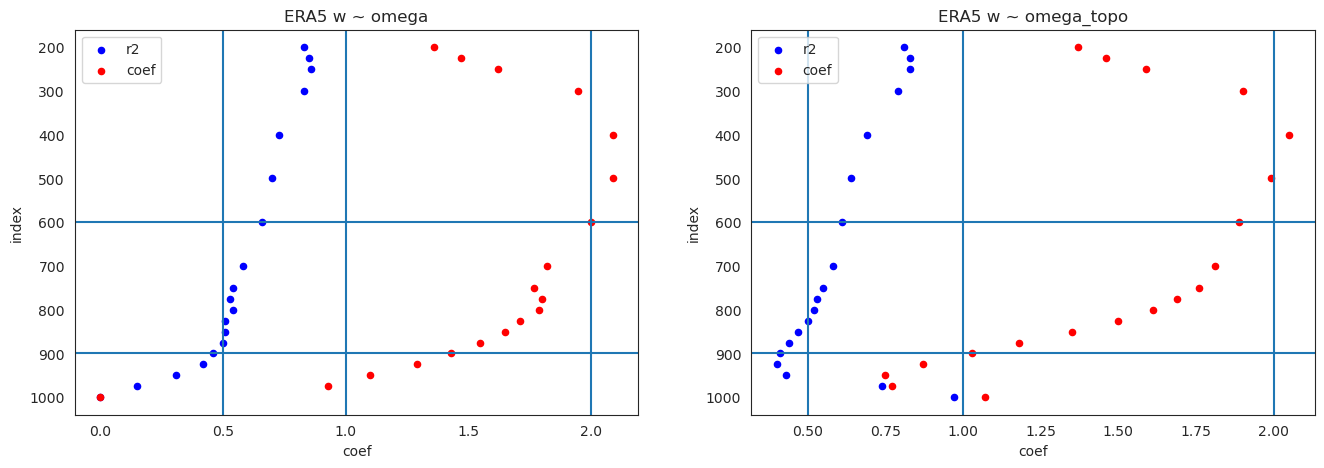

In [202]:
%matplotlib inline
fig,ax=plt.subplots(1,2,figsize=(16,5))

df_Omega_anal.loc[df_Omega_anal.index >= 200].reset_index()\
.plot.scatter(y="index", x="r2",ax=ax[0], c="blue", label="R2")
df_Omega_anal.loc[df_Omega_anal.index >= 200].reset_index()\
.plot.scatter(y="index", x="coef",ax=ax[0], c='red', label="coef")
ax[0].legend(["r2", "coef"], loc="best")
ax[0].set_title("ERA5 w ~ omega")

ax[0].axvline(0.5)
ax[0].axvline(1)
ax[0].axvline(2)
ax[0].axhline(600)
ax[0].axhline(900)

ax[0].invert_yaxis()

df_Omega_topo_anal.loc[df_Omega_topo_anal.index >= 200].reset_index()\
.plot.scatter(y="index", x="r2",ax=ax[1], c="blue", label="R2")
df_Omega_topo_anal.loc[df_Omega_topo_anal.index >= 200].reset_index()\
.plot.scatter(y="index", x="coef",ax=ax[1], c='red', label="coef")
ax[1].legend(["r2", "coef"], loc="upper left")
ax[1].set_title("ERA5 w ~ omega_topo")
ax[1].axvline(0.5)
ax[1].axvline(1)
ax[1].axvline(2)
ax[1].axhline(600)
ax[1].axhline(900)

ax[1].invert_yaxis()

In [ ]:
df_

In [200]:
pd.merge(df_Omega_anal, df_Omega_topo_anal, left_index=True, right_index=True)

,r2_x,coef_x,r2_y,coef_y
100.0,-0.0,0.0,0.0,0.0
125.0,0.74,1.58,0.74,1.6
150.0,0.77,1.34,0.76,1.35
175.0,0.8,1.31,0.79,1.32
200.0,0.83,1.36,0.81,1.37
225.0,0.85,1.47,0.83,1.46
250.0,0.86,1.62,0.83,1.59
300.0,0.83,1.95,0.79,1.9
400.0,0.73,2.09,0.69,2.05
500.0,0.7,2.09,0.64,1.99


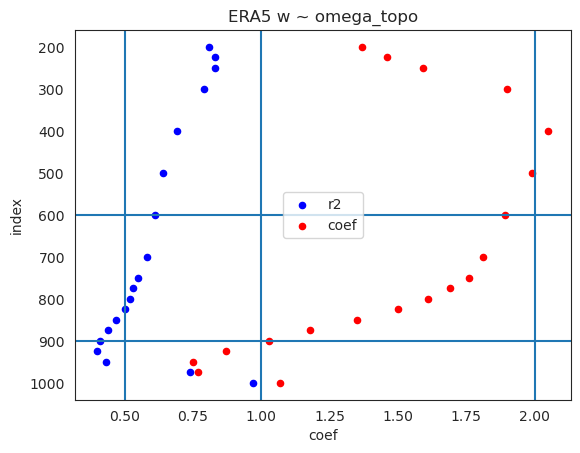

In [191]:
a = da1_xinv_omega\
    .sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
    .sel(isobaricInhPa = 
             [s for s in da1_xinv_omega.isobaricInhPa.values if s in ds_M.isobaricInhPa.values]\
    ).sortby('isobaricInhPa')

b = ds_M['M']\
    .sel(isobaricInhPa = slice(600,900), date = ds_M.date.dt.year.isin(range(year_min, year_max+1)) 
#          & ds_M.date.dt.year != 2016 
         & ds_M.date.dt.month.isin([3,4]))\
    .sortby('isobaricInhPa')

In [36]:
print(len(a.date))

len(np.unique(a.date))

2608


2608

In [72]:
# da1_xinv_omega['isobaricInhPa'] = da1_xinv_omega['isobaricInhPa']/100

da1_comp = vert_MassAve_qty(
    M = ds_M['M']
    .sel(
        isobaricInhPa = slice(600,900), 
        date = ds_M.date.dt.year.isin(range(year_min, year_max+1)) & ds_M.date.dt.month.isin([3,4])
    )
    .sortby('isobaricInhPa'), 
    
    qty = da1_xinv_omega
    .sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))
    .sel(
        isobaricInhPa = 
        [s for s in da1_xinv_omega.isobaricInhPa.values if s in ds_M.isobaricInhPa.values]
    ).sortby('isobaricInhPa').compute(),
    
    p_low=600, p_high=900,
    filt_ni=False, sp_ave=True
)

# da1_comp.rename('Omega')
# ds_plt = xr.merge([da1_comp.rename('Omega'), da_era5_omega])

ds_plt = xr.merge([da1_comp.rename('Omega'), da_era5.rename('w')])

In [41]:
ds_plt

NameError: name 'ds_plt' is not defined

In [74]:
ds_plt\
.to_netcdf("/home/data/lab_hardik/heatwaves/ERA5/analyses/RWP/qg_omega/processed_files/daily_qgomega_era5w_1980_2022.nc")

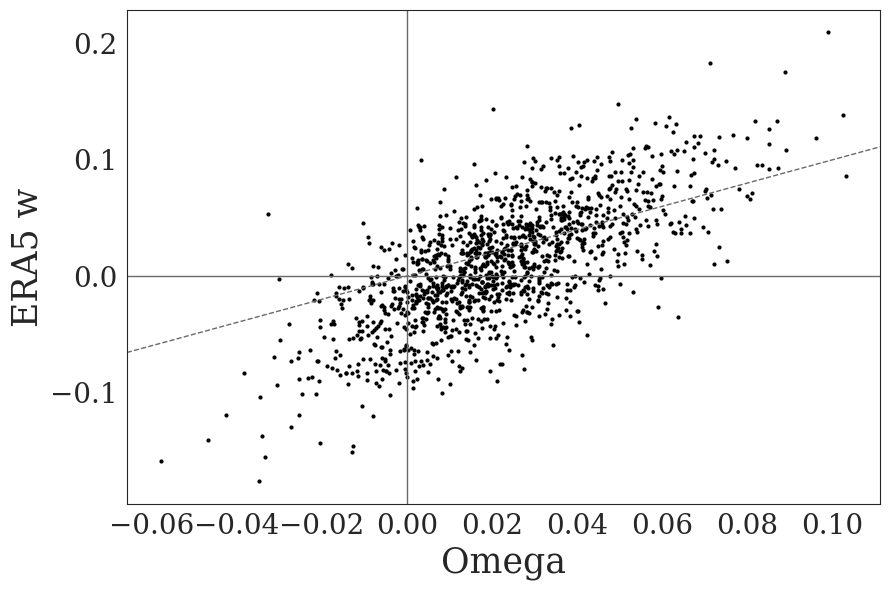

In [189]:
params = {
#     'legend.fontsize': 10,
#           'legend.title_fontsize': 10,
#           'figure.figsize': (15, 5),
         'axes.labelsize':25, # this controls labelsize of both x and y axis of main plot as well as colorbar  
         'axes.titlesize':25, # pot title size
         'xtick.labelsize':20,
         'ytick.labelsize':20, # this controls yticks labelsize of both main plot and colorbar 
#    'lines.markersize': 1,
        'font.family': 'DejaVu Serif',
}
plt.rcParams.update(params)

fig,ax = plt.subplots(figsize=(9,6))

ds_plt.to_pandas().plot.scatter(x='Omega', y='w',s=4,c='k',ax=ax)
# plt.xlim(-0.05,0.05)
# plt.ylim(-0.05,0.05)
ax.set_xlabel('Omega')
ax.set_ylabel('ERA5 w')
ax.axhline(0, c='dimgray', ls='-', lw=1)
ax.axvline(0, c='dimgray', ls='-', lw=1)
ax.axline((0,0), slope=1, c='dimgray', ls='--', lw=1)
# xticks = ax.get_xticks().round(3)
# ax.set_xticklabels(xticks, )
plt.tight_layout()

pdf_path = '/home/data/lab_hardik/Manuscript1/Supplem_Mar_Apr_Omega_w.pdf'
plt.savefig(pdf_path, format='pdf', bbox_inches='tight')  # Use savefig to save as PDF


In [177]:
xticks = ax.get_xticks().round(2)
ax.set_xticklabels(xticks, )

/tmp/ipykernel_1985742/3141279919.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


[Text(-0.07500000000000001, 0, '-0.08'),
 Text(-0.05000000000000001, 0, '-0.05'),
 Text(-0.02500000000000001, 0, '-0.03'),
 Text(0.0, 0, '0.0'),
 Text(0.024999999999999994, 0, '0.02'),
 Text(0.04999999999999999, 0, '0.05'),
 Text(0.07500000000000001, 0, '0.08'),
 Text(0.1, 0, '0.1'),
 Text(0.125, 0, '0.12')]

In [162]:
ds_plt.groupby(ds_plt.date.dt.year).count()

<xarray.Dataset>
Dimensions:  (year: 43)
Coordinates:
    number   int64 0
    step     timedelta64[ns] 00:00:00
    surface  float64 0.0
  * year     (year) int64 1980 1981 1982 1983 1984 ... 2018 2019 2020 2021 2022
Data variables:
    Omega    (year) int64 61 61 61 61 61 61 61 61 61 ... 61 61 61 61 61 61 61 61
    w        (year) int64 0 0 0 0 0 0 0 0 0 0 0 ... 61 61 61 0 61 61 61 61 61 61

## Metpy forcing

In [69]:
files = [s for s in os.listdir() if 'metpy_forcing_xinv_omega_2010_' in s]
files_2010 = [s for s in files if int(s.split('_')[-2]) in [3,4]]
len(files_2010)
files_2010.sort(key = day_sort)
files_2010.sort(key = mon_sort)
files_2010.sort(key = year_sort)
files_2010 = files_2010[1:]

files = [s for s in os.listdir() if 'metpy_forcing_xinv_omega_2016_' in s]
files_2016 = [s for s in files if int(s.split('_')[-2]) in [3,4]]
len(files_2016)
files_2016.sort(key = day_sort)
files_2016.sort(key = mon_sort)
files_2016.sort(key = year_sort)


In [112]:
ds_2010 = xr.open_mfdataset(
    files_2010,
    combine='nested',
    concat_dim='time'
)

In [187]:
da_2010 = ds_2010['Omega_topo']

In [188]:
da_2010 = da_2010.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
.sel(vertical = slice(60000, 90000))\
.compute()

# da_2010
# ds_2010.to_netcdf('/home/data/lab_hardik/daily_means/metpy_xinv_2010_prmnsn_vertical_diagnosis.nc')

In [189]:
gc.collect()

10161

In [109]:
os.chdir(dir_omega_data)
ds_2016 = xr.open_mfdataset(
    files_2016,
    combine='nested',
    concat_dim='time'
)

In [190]:
da_2016 = ds_2016['Omega_topo']

In [191]:
da_2016 = da_2016.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
.sel(vertical = slice(60000, 90000))\
.compute()

# da_2016
# ds_2016.to_netcdf('/home/data/lab_hardik/daily_means/metpy_xinv_2016_prmnsn_vertical_diagnosis.nc')

In [77]:
# ds_2010 = xr.open_dataset('/home/data/lab_hardik/daily_means/metpy_xinv_2010_prmnsn_vertical_diagnosis.nc')
# ds_2016 = xr.open_dataset('/home/data/lab_hardik/daily_means/metpy_xinv_2016_prmnsn_vertical_diagnosis.nc')


In [192]:
da_xinv_omega = xr.concat([da_2010, da_2016], dim='time').rename({'time':'date', 'vertical':'isobaricInhPa'}).sortby('date')

In [194]:
da_xinv_omega['isobaricInhPa'] = da_xinv_omega['isobaricInhPa']/100

da_comp = vert_MassAve_qty(
    M = ds_M['M']
    .sel(isobaricInhPa = slice(600,900), date = ds_M.date.dt.year.isin([2010,2016]) & ds_M.date.dt.month.isin([3,4]))
    .sortby('isobaricInhPa'), 
    
    qty = da_xinv_omega
    .sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))
    .sel(isobaricInhPa = 
             [s for s in da_xinv_omega.isobaricInhPa.values if s in ds_M.isobaricInhPa.values]
    ).sortby('isobaricInhPa').compute(),
    
    p_low=600, p_high=900,
    filt_ni=False, sp_ave=True
)

# da_comp.rename('Omega')


ds_plt = xr.merge([da_comp.rename('Omega'), da_era5_omega])

ds_plt.to_pandas().plot.scatter(x='Omega', y='w')
# plt.xlim(-0.05,0.05)
# plt.ylim(-0.05,0.05)

plt.show()

## xinv_forcing_omega

In [21]:
files1 = [s for s in os.listdir() if 'xinv_forcing_omega_2010_' in s]
files1_2010 = [s for s in files1 if int(s.split('_')[-2]) in [3,4]]
print(len(files1_2010))
files1_2010.sort(key = day_sort)
files1_2010.sort(key = mon_sort)
files1_2010.sort(key = year_sort)
# files1_2010 = files1_2010[1:]

files1 = [s for s in os.listdir() if 'xinv_forcing_omega_2016_' in s]
files1_2016 = [s for s in files1 if int(s.split('_')[-2]) in [3,4]]
print(len(files1_2016))
files1_2016.sort(key = day_sort)
files1_2016.sort(key = mon_sort)
files1_2016.sort(key = year_sort)


61
61


In [205]:
os.chdir(dir_omega_data)
ds1_2010 = xr.open_mfdataset(
    files1_2010,
    combine='nested',
    concat_dim='time'
)

In [205]:
os.chdir(dir_omega_data)
ds1_2010 = xr.open_mfdataset(
    files1_2010,
    combine='nested',
    concat_dim='time'
)

In [216]:
da1_2010 = ds1_2010['Omega_topo']

da1_2010 = da1_2010.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
.sel(vertical = slice(90000, 60000))\
.compute()

# da1_2010
# ds1_2010.to_netcdf('/home/da1ta/lab_hardik/da1ily_means/metpy_xinv_2010_prmnsn_vertical_diagnosis.nc')

In [217]:
gc.collect()

22756

In [215]:
os.chdir(dir_omega_data)
ds1_2016 = xr.open_mfdataset(
    files_2016,
    combine='nested',
    concat_dim='time'
)

da1_2016 = ds1_2016['Omega_topo']

da1_2016 = da1_2016.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
.sel(vertical = slice(90000, 60000))\
.compute()

# da1_2016
# ds1_2016.to_netcdf('/home/da1ta/lab_hardik/da1ily_means/metpy_xinv_2016_prmnsn_vertical_diagnosis.nc')

In [227]:
ds1_2010.vertical

<xarray.DataArray 'vertical' (vertical: 23)>
array([100000.,  97500.,  95000.,  92500.,  90000.,  87500.,  85000.,  82500.,
        80000.,  77500.,  75000.,  70000.,  60000.,  50000.,  40000.,  30000.,
        25000.,  22500.,  20000.,  17500.,  15000.,  12500.,  10000.])
Coordinates:
    number    int64 0
    step      timedelta64[ns] 00:00:00
    surface   float64 0.0
  * vertical  (vertical) float64 1e+05 9.75e+04 9.5e+04 ... 1.25e+04 1e+04

In [228]:
ds1_2016.vertical

<xarray.DataArray 'vertical' (vertical: 46)>
array([   100.,    125.,    150.,    175.,    200.,    225.,    250.,    300.,
          400.,    500.,    600.,    700.,    750.,    775.,    800.,    825.,
          850.,    875.,    900.,    925.,    950.,    975.,   1000.,  10000.,
        12500.,  15000.,  17500.,  20000.,  22500.,  25000.,  30000.,  40000.,
        50000.,  60000.,  70000.,  75000.,  77500.,  80000.,  82500.,  85000.,
        87500.,  90000.,  92500.,  95000.,  97500., 100000.])
Coordinates:
  * vertical  (vertical) float64 100.0 125.0 150.0 ... 9.5e+04 9.75e+04 1e+05
    number    int64 0
    step      timedelta64[ns] 00:00:00
    surface   float64 0.0
Attributes:
    long_name:         pressure
    units:             hPa
    positive:          down
    stored_direction:  decreasing
    standard_name:     air_pressure
    _metpy_axis:       vertical

In [77]:
# ds_2010 = xr.open_dataset('/home/data/lab_hardik/daily_means/metpy_xinv_2010_prmnsn_vertical_diagnosis.nc')
# ds_2016 = xr.open_dataset('/home/data/lab_hardik/daily_means/metpy_xinv_2016_prmnsn_vertical_diagnosis.nc')


In [224]:
da1_2016
# \.dims

<xarray.DataArray 'Omega_topo' (time: 61, vertical: 0, latitude: 29,
                                longitude: 41)>
array([], shape=(61, 0, 29, 41), dtype=float32)
Coordinates:
  * latitude   (latitude) float64 31.0 30.75 30.5 30.25 ... 24.5 24.25 24.0
  * vertical   (vertical) float64 
  * longitude  (longitude) float64 68.0 68.25 68.5 68.75 ... 77.5 77.75 78.0
    number     int64 0
    step       timedelta64[ns] 00:00:00
  * time       (time) datetime64[ns] 2016-03-01 2016-03-02 ... 2016-04-30
    surface    float64 0.0

In [229]:
da1_xinv_omega = da1_2010\
.rename({'time':'date', 'vertical':'isobaricInhPa'}).sortby('date')

/tmp/ipykernel_2381958/1778175792.py:1: UserWarning: rename 'time' to 'date' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.


In [235]:
da1_xinv_omega\
    .sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
    .sel(isobaricInhPa = 
             [s for s in da1_xinv_omega.isobaricInhPa.values if s in ds_M.isobaricInhPa.values]\
    ).sortby('isobaricInhPa')

<xarray.DataArray 'Omega_topo' (date: 60, isobaricInhPa: 0, latitude: 29,
                                longitude: 41)>
array([], shape=(60, 0, 29, 41), dtype=float32)
Coordinates:
    number         int64 0
    step           timedelta64[ns] 00:00:00
  * latitude       (latitude) float64 31.0 30.75 30.5 30.25 ... 24.5 24.25 24.0
  * date           (date) datetime64[ns] 2010-03-02 2010-03-03 ... 2010-04-30
    surface        float64 0.0
  * longitude      (longitude) float64 68.0 68.25 68.5 68.75 ... 77.5 77.75 78.0
  * isobaricInhPa  (isobaricInhPa) float64

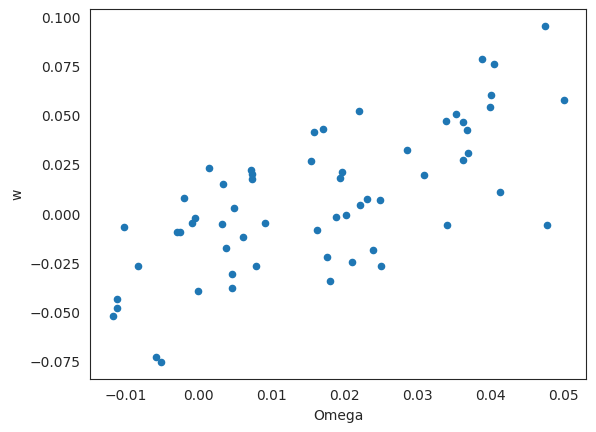

In [238]:
# da1_xinv_omega['isobaricInhPa'] = da1_xinv_omega['isobaricInhPa']/100

da1_comp = vert_MassAve_qty(
    M = ds_M['M']
    .sel(isobaricInhPa = slice(600,900), date = ds_M.date.dt.year.isin([2010]) & ds_M.date.dt.month.isin([3,4]))
    .sortby('isobaricInhPa'), 
    
    qty = da1_xinv_omega
    .sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))
    .sel(isobaricInhPa = 
             [s for s in da1_xinv_omega.isobaricInhPa.values if s in ds_M.isobaricInhPa.values]
    ).sortby('isobaricInhPa').compute(),
    
    p_low=600, p_high=900,
    filt_ni=False, sp_ave=True
)

# da1_comp.rename('Omega')


ds_plt = xr.merge([da1_comp.rename('Omega'), da_era5_omega])

ds_plt.to_pandas().plot.scatter(x='Omega', y='w')
# plt.xlim(-0.05,0.05)
# plt.ylim(-0.05,0.05)

plt.show()

In [2]:
1

1

In [8]:
da1_comp

NameError: name 'da1_comp' is not defined

In [239]:
ds_2016.close()

## Vertical Str

In [39]:
ds_t2m_anoms = xr.open_dataset('/home/data/lab_hardik/daily_means/dtree_anoms/t2m_anoms.nc')\
.sortby(['latitude','longitude','date'])

t2m_anom_series_2010 = ds_t2m_anoms['t2m_anom_10D']\
.sel(latitude=slice(nibox_lat[0], nibox_lat[1]), 
     longitude=slice(nibox_lon[0], nibox_lon[1]), 
    date = (ds_t2m_anoms.date.dt.year==2010) & (ds_t2m_anoms.date.dt.month.isin([3,4,5,6])))\
.mean(['latitude','longitude']).drop(['number','step','surface']).chunk({'date':-1}).persist()

t2m_anom_series_2016 = ds_t2m_anoms['t2m_anom_10D']\
.sel(latitude=slice(nibox_lat[0], nibox_lat[1]), 
     longitude=slice(nibox_lon[0], nibox_lon[1]), 
    date = (ds_t2m_anoms.date.dt.year==2016) & (ds_t2m_anoms.date.dt.month.isin([3,4,5,6])))\
.mean(['latitude','longitude']).drop(['number','step','surface']).chunk({'date':-1}).persist()

## Omega

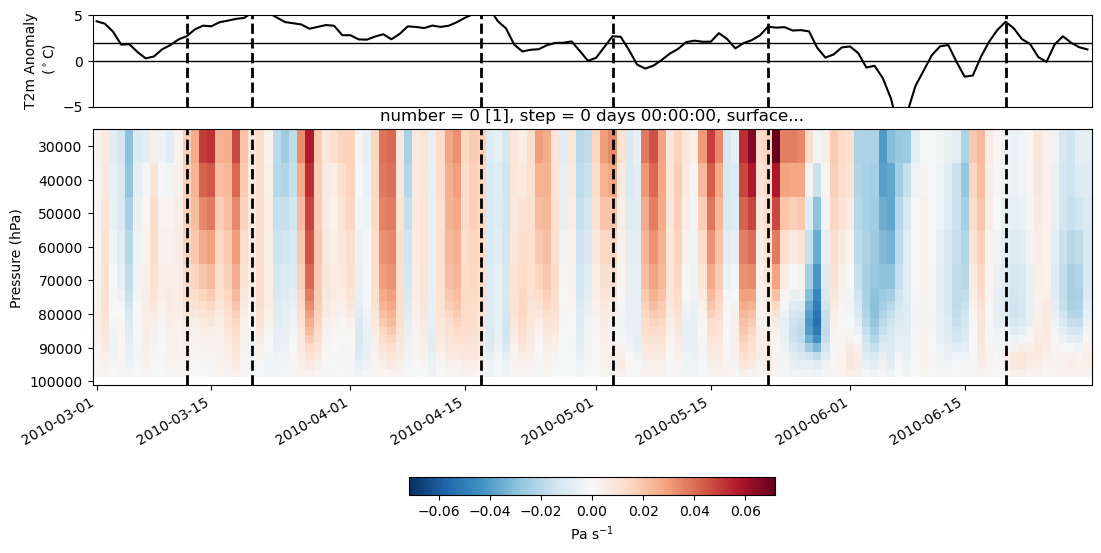

In [67]:
# Start with a square Figure
fig = plt.figure(figsize=(16,6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions
# Also adjust the subplot parameters for a square plot
gs = fig.add_gridspec(2, 2,  height_ratios=(1, 4), width_ratios=(4, 1),
                      left=0.1, right=0.9, 
                      bottom=0.1, top=0.9,
                      hspace=0.1, wspace=0.05)
# Create the Axes
ax = fig.add_subplot(gs[1,0])
ax_t2m = fig.add_subplot(gs[0,0], sharex=ax)

ds_2010['Omega']\
.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]), vertical=slice(30000, 100000))\
.mean(['latitude','longitude'])\
.transpose()\
.plot(ax=ax, add_colorbar=True, cbar_kwargs=dict(orientation='horizontal', 
                                                 label='Pa $\mathregular{s^{-1}}$', 
                                                fraction=0.05, pad=0.25)
     )

ax.invert_yaxis()
# (sp_plt_series/100)\
# .plot(ax=ax, color='black')

ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('')
# ax.axhline(500)
# ax.axhline(800)

(t2m_anom_series_2010)\
.plot(ax=ax_t2m, color='black')
ax_t2m.set_ylim([-5,5])
ax_t2m.get_xaxis().set_visible(False)
ax_t2m.axhline(0, color='black', linewidth=1)
ax_t2m.axhline(2, color='black', linewidth=1)
ax_t2m.set_ylabel('T2m Anomaly\n ($^\circ$C)')

for axis in [ax, ax_t2m]:
    axis.axvline(
        dt(2010,3,12), 
        color='black', linewidth=2, linestyle='--')
    axis.axvline(
        dt(2010,3,20), 
        color='black', linewidth=2, linestyle='--')
    axis.axvline(
        dt(2010,4,17), 
        color='black', linewidth=2, linestyle='--')
    axis.axvline(
        dt(2010,5,3), 
        color='black', linewidth=2, linestyle='--')
    axis.axvline(
        dt(2010,5,22), 
        color='black', linewidth=2, linestyle='--')
    axis.axvline(
        dt(2010,6,20), 
        color='black', linewidth=2, linestyle='--')

In [55]:
hw_dts_2016 = pd.read_csv('/home/data/lab_hardik/daily_means/2016_t2m_anoms_2plus_dts.csv', 
            usecols=lambda c: not c.startswith('Unnamed:')).date.astype('datetime64[D]').to_numpy()

In [57]:
hw_dts_2010 = pd.read_csv('/home/data/lab_hardik/daily_means/2010_t2m_anoms_2plus_dts.csv', 
            usecols=lambda c: not c.startswith('Unnamed:')).date.astype('datetime64[D]').to_numpy()

## Omega_topo

Text(0, 0.5, 'T2m Anomaly\n ($^\\circ$C)')

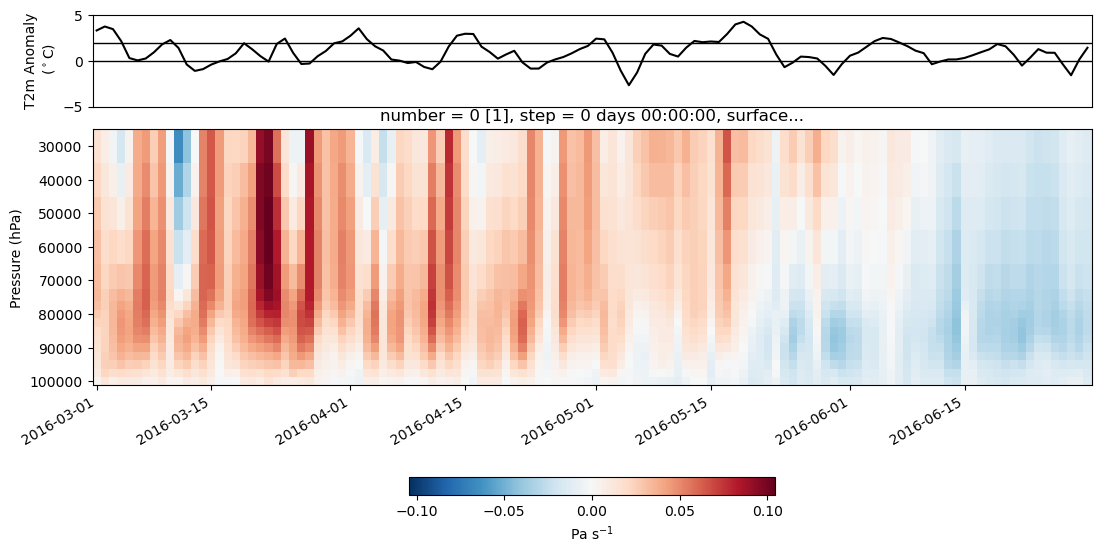

In [70]:
# Start with a square Figure
fig = plt.figure(figsize=(16,6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions
# Also adjust the subplot parameters for a square plot
gs = fig.add_gridspec(2, 2,  height_ratios=(1, 4), width_ratios=(4, 1),
                      left=0.1, right=0.9, 
                      bottom=0.1, top=0.9,
                      hspace=0.1, wspace=0.05)
# Create the Axes
ax = fig.add_subplot(gs[1,0])
ax_t2m = fig.add_subplot(gs[0,0], sharex=ax)

ds_2016['Omega_topo']\
.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]), vertical=slice(30000, 100000))\
.mean(['latitude','longitude'])\
.transpose()\
.plot(ax=ax, add_colorbar=True, cbar_kwargs=dict(orientation='horizontal', 
                                                 label='Pa $\mathregular{s^{-1}}$', 
                                                fraction=0.05, pad=0.25)
     )

ax.invert_yaxis()
# (sp_plt_series/100)\
# .plot(ax=ax, color='black')

ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('')
# ax.axhline(500)
# ax.axhline(800)


(t2m_anom_series_2016)\
.plot(ax=ax_t2m, color='black')
ax_t2m.set_ylim([-5,5])
ax_t2m.get_xaxis().set_visible(False)
ax_t2m.axhline(0, color='black', linewidth=1)
ax_t2m.axhline(2, color='black', linewidth=1)
ax_t2m.set_ylabel('T2m Anomaly\n ($^\circ$C)')

# for axis in [ax, ax_t2m]:
#     for dat in hw_dts_2016:
#         axis.axvline(
#             dat, 
#             color='black', linewidth=1, linestyle='--')

Text(0.5, 0, '')

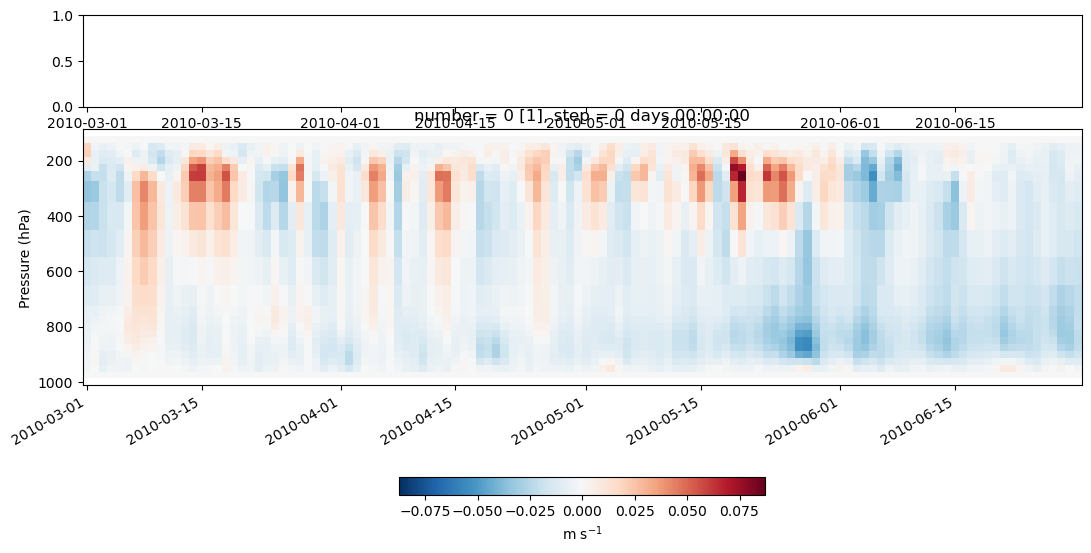

In [15]:
# Start with a square Figure
fig = plt.figure(figsize=(16,6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions
# Also adjust the subplot parameters for a square plot
gs = fig.add_gridspec(2, 2,  height_ratios=(1, 4), width_ratios=(4, 1),
                      left=0.1, right=0.9, 
                      bottom=0.1, top=0.9,
                      hspace=0.1, wspace=0.05)
# Create the Axes
ax = fig.add_subplot(gs[1,0])
ax_t2m = fig.add_subplot(gs[0,0], sharex=ax)

ds_2010['qg_w']\
.sel(latitude=slice(nibox_lat[0], nibox_lat[1]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
.mean(['latitude','longitude'])\
.transpose()\
.plot(ax=ax, add_colorbar=True, cbar_kwargs=dict(orientation='horizontal', 
                                                 label='m $\mathregular{s^{-1}}$', 
                                                fraction=0.05, pad=0.25))
ax.invert_yaxis()
# (sp_plt_series/100)\
# .plot(ax=ax, color='black')

ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('')
# ax.axhline(500)
# ax.axhline(800)

# (t2m_anom_series)\
# .plot(ax=ax_t2m, color='black')
# ax_t2m.set_ylim([-5,5])
# ax_t2m.get_xaxis().set_visible(False)
# ax_t2m.axhline(0, color='black', linewidth=1)
# ax_t2m.axhline(2, color='black', linewidth=1)
# ax_t2m.set_ylabel('T2m Anomaly\n ($^\circ$C)')

# for axis in [ax, ax_t2m]:
#     axis.axvline(
#         dt(2010,3,12), 
#         color='black', linewidth=2, linestyle='--')
#     axis.axvline(
#         dt(2010,3,20), 
#         color='black', linewidth=2, linestyle='--')
#     axis.axvline(
#         dt(2010,4,17), 
#         color='black', linewidth=2, linestyle='--')
#     axis.axvline(
#         dt(2010,5,3), 
#         color='black', linewidth=2, linestyle='--')
#     axis.axvline(
#         dt(2010,5,22), 
#         color='black', linewidth=2, linestyle='--')
#     axis.axvline(
#         dt(2010,6,20), 
#         color='black', linewidth=2, linestyle='--')

In [9]:
a = xr.open_dataset('/home/data/lab_hardik/daily_means/qg_omega/forcing_invOmega_Mar01_Jun16_2016.nc')\
.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))

b = xr.open_dataset('/home/data/lab_hardik/daily_means/qg_omega/forcing_invOmega_Jun17_Jun30_2016.nc')\
.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))

ds_omega = xr.concat([a,b], dim='time')

ds_bflx = xr.open_mfdataset('/home/data/lab_hardik/daily_means/daily_heat_fluxes/heat_flxs_2016*_nibox.nc')\
.drop(['number','step'])

ds_rho = ds_bflx['density'].rename({'isobaricInhPa':'vertical', 'date':'time'}).sel(vertical=slice(300, 975)).mean(['latitude','longitude'])

ds_plt = xr.merge(
    [
        ds_rho, ds_omega['omega'].sel(vertical=slice(975,300)).mean(['latitude','longitude'])
    ]
)

da_plt = ds_plt['omega']/((9.80665*ds_plt['density'])).compute()
da_plt.name = 'vertical_velocity'
da_plt

In [86]:
df_ni_t2m_anoms = pd.read_csv('/home/data/lab_hardik/daily_means/2016_apr_jun_t2m_anoms_2plus_dts.csv')

In [87]:
df_ni_t2m_anoms['date'] = pd.to_datetime(df_ni_t2m_anoms['date'])

In [88]:
df_ni_t2m_anoms['dtdiff'] = df_ni_t2m_anoms['date'] - df_ni_t2m_anoms['date'].shift(1)
plt_dts = df_ni_t2m_anoms.loc[df_ni_t2m_anoms.dtdiff.isna() | (df_ni_t2m_anoms.dtdiff>timedelta(1)),'date']
plt_dts

0    2016-03-01
4    2016-03-10
5    2016-03-24
6    2016-03-31
10   2016-04-14
13   2016-05-01
15   2016-05-13
25   2016-06-04
Name: date, dtype: datetime64[ns]

In [89]:
ds_t2m_anoms = xr.open_dataset('/home/data/lab_hardik/daily_means/dtree_anoms/t2m_anoms.nc')\
.sortby(['latitude','longitude','date'])

t2m_anom_series = ds_t2m_anoms['t2m_anom_10D']\
.sel(latitude=slice(nibox_lat[0], nibox_lat[1]), 
     longitude=slice(nibox_lon[0], nibox_lon[1]), 
    date = (ds_t2m_anoms.date.dt.year==2016) & (ds_t2m_anoms.date.dt.month.isin([3,4,5,6])))\
.mean(['latitude','longitude']).drop(['number','step','surface']).chunk({'date':-1}).compute()

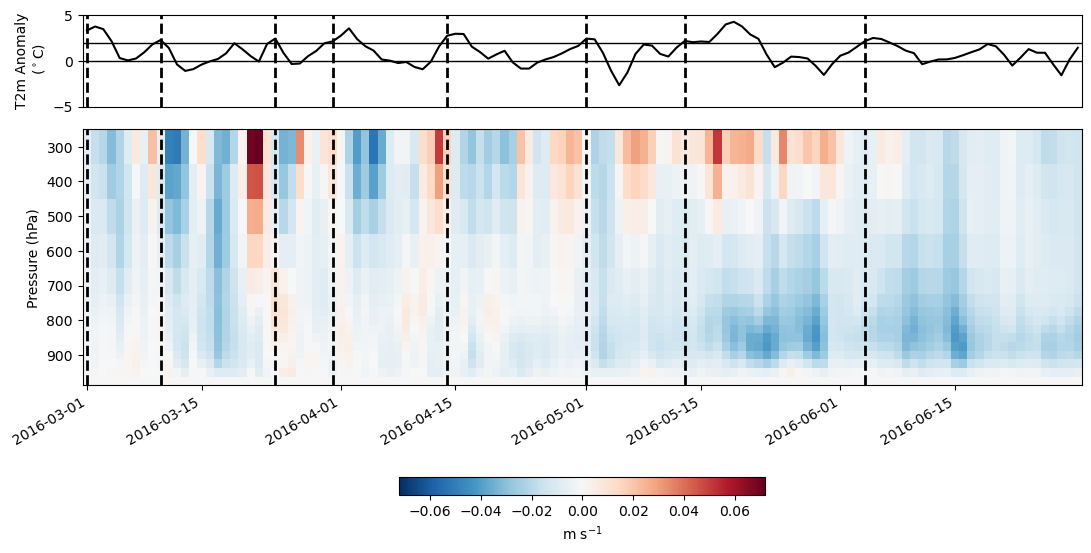

In [18]:
# Start with a square Figure
fig = plt.figure(figsize=(16,6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions
# Also adjust the subplot parameters for a square plot
gs = fig.add_gridspec(2, 2,  height_ratios=(1, 4), width_ratios=(4, 1),
                      left=0.1, right=0.9, 
                      bottom=0.1, top=0.9,
                      hspace=0.1, wspace=0.05)
# Create the Axes
ax = fig.add_subplot(gs[1,0])
ax_t2m = fig.add_subplot(gs[0,0], sharex=ax)

da_plt.transpose()\
.plot(ax=ax, add_colorbar=True, cbar_kwargs=dict(orientation='horizontal', 
                                                 label='m $\mathregular{s^{-1}}$', 
                                                fraction=0.05, pad=0.25))
ax.invert_yaxis()
# (sp_plt_series/100)\
# .plot(ax=ax, color='black')

ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('')
# ax.axhline(500)
# ax.axhline(800)

(t2m_anom_series)\
.plot(ax=ax_t2m, color='black')
ax_t2m.set_ylim([-5,5])
ax_t2m.get_xaxis().set_visible(False)
ax_t2m.axhline(0, color='black', linewidth=1)
ax_t2m.axhline(2, color='black', linewidth=1)
ax_t2m.set_ylabel('T2m Anomaly\n ($^\circ$C)')

for dt in plt_dts:
    ax.axvline(
            dt, color='black', linewidth=2, linestyle='--'
    )
    ax_t2m.axvline(
            dt, color='black', linewidth=2, linestyle='--'
    )
# plt.savefig("/home/data/lab_hardik/daily_means/qg_omega/3d_w_2016.pdf", format="pdf", bbox_inches="tight")


# Difference bw ERA5 w and xinv omega

In [19]:
da_w_diff = ds_bflx['w'].rename({'isobaricInhPa':'vertical', 'date':'time'}).sel(vertical=slice(300, 975))\
.mean(['latitude','longitude']) - da_plt


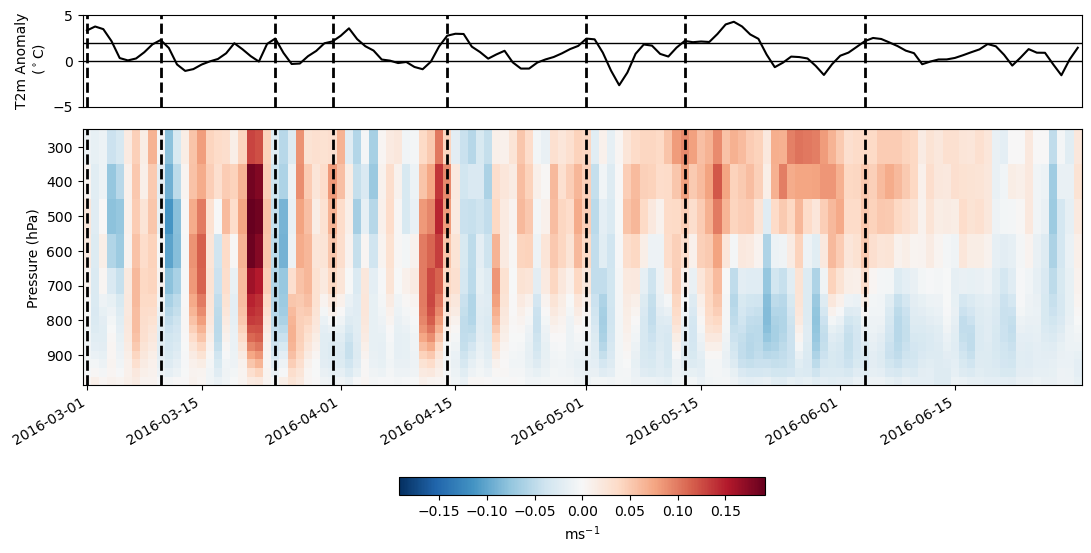

In [20]:
# Start with a square Figure
fig = plt.figure(figsize=(16,6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions
# Also adjust the subplot parameters for a square plot
gs = fig.add_gridspec(2, 2,  height_ratios=(1, 4), width_ratios=(4, 1),
                      left=0.1, right=0.9, 
                      bottom=0.1, top=0.9,
                      hspace=0.1, wspace=0.05)
# Create the Axes
ax = fig.add_subplot(gs[1,0])
ax_t2m = fig.add_subplot(gs[0,0], sharex=ax)

da_w_diff.transpose()\
.plot(ax=ax, add_colorbar=True, cbar_kwargs=dict(orientation='horizontal', 
                                                 label='m$\mathregular{s^{-1}}$', 
                                                fraction=0.05, pad=0.25))
ax.invert_yaxis()
# (sp_plt_series/100)\
# .plot(ax=ax, color='black')

ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('')
# ax.axhline(500)
# ax.axhline(800)

(t2m_anom_series)\
.plot(ax=ax_t2m, color='black')
ax_t2m.set_ylim([-5,5])
ax_t2m.get_xaxis().set_visible(False)
ax_t2m.axhline(0, color='black', linewidth=1)
ax_t2m.axhline(2, color='black', linewidth=1)
ax_t2m.set_ylabel('T2m Anomaly\n ($^\circ$C)')


for dt in plt_dts:
    ax.axvline(
            dt, color='black', linewidth=2, linestyle='--'
    )
    ax_t2m.axvline(
            dt, color='black', linewidth=2, linestyle='--'
    )

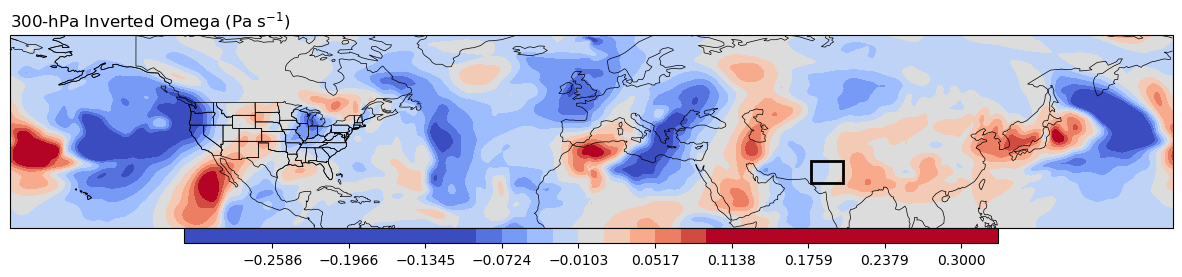

In [7]:
x = xr.open_dataset('/home/data/lab_hardik/daily_means/qg_omega/forcing_invOmega_Mar01_Jun16_2016.nc')

dataproj = ccrs.PlateCarree()
fig=plt.figure(1, figsize=(15.,12.))
xmin=0
xmax=200
ymin=10
ymax=70

# Plot the term A QG Omega forcing term 
ax=plt.subplot(111,projection=dataproj)
ax.set_extent([xmin,xmax,ymin,ymax],ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.STATES,linewidth=0.5)

# lats_plt = [s for s in lats if (s.magnitude>=ymin) and (s.magnitude<=ymax)]
# lons_plt = [s for s in lons if (s.magnitude>=xmin) and (s.magnitude<=xmax)]

# Colorfill
# da_plt = term_A.sel(latitude=slice(50,10), longitude=slice(30,120))
da_plt = x['omega'].sel(vertical=300).isel(time=0)
# , latitude=slice(50,10), longitude=slice(30,120)

cf = ax.contourf(da_plt.longitude, 
                 da_plt.latitude, 
                 da_plt.values/4, # *10**12 
#                  clev_omega,
                 levels = np.linspace(
                     -.3,.3,30
                 ),
                 cmap = 'coolwarm',  
                 vmax = .1,
                 vmin = -.1,
                 extend='both', transform=dataproj
                )
plt.colorbar(cf, orientation='horizontal', pad=0.0, shrink=0.7, aspect=50, extendrect=True)
ax.add_patch(mpatches.Rectangle(xy=[68, 24], width=10, height=7,
                                facecolor='none', 
                                edgecolor='black', 
                                linewidth=2))
# Vector
# ax.barbs(lons.m, lats.m, uwnd_300s.metpy.unit_array.to('kts').m, vwnd_300s.metpy.unit_array.to('kts').m,
#          regrid_shape=15, transform=dataproj)

# Titles
plt.title('300-hPa Inverted Omega (Pa s$^{-1}$)',loc='left') # $*10^{11}$ 
# plt.title('VALID: ' + str(pd.to_datetime(hght_300s.time.item()).date()), loc='right')

plt.show()

# .plot(vmax=10**1)

# .plot(vmax=10**-5)

In [16]:
ds_u = xr.open_dataset('/home/data/lab_hardik/daily_means/u_component_of_wind/era5_u_component_of_wind_2016_3_1.nc')\
.drop(['number','step'])\
.metpy.parse_cf()
ds_v = xr.open_dataset('/home/data/lab_hardik/daily_means/v_component_of_wind/era5_v_component_of_wind_2016_3_1.nc')\
.drop(['number','step'])\
.metpy.parse_cf()
ds_z = xr.open_dataset('/home/data/lab_hardik/daily_means/geopotential/era5_geopotential_2016_3_1.nc')\
.drop(['number','step'])\
.metpy.parse_cf()


## QG validity

In [127]:
ug, vg = mpcalc.geostrophic_wind(ds_z['z'].sel(isobaricInhPa=300).isel(date=0)*units('m^2 s^-2'))
# /(9.81*units('m s^-2'))

/home/lab_hardik/my_conda/lib/python3.9/site-packages/pint/facets/plain/quantity.py:1042: RuntimeWarning: divide by zero encountered in divide
  return self.__class__(other_magnitude / self._magnitude, 1 / self._units)
/home/lab_hardik/my_conda/lib/python3.9/site-packages/pint/facets/plain/quantity.py:986: RuntimeWarning: invalid value encountered in multiply
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


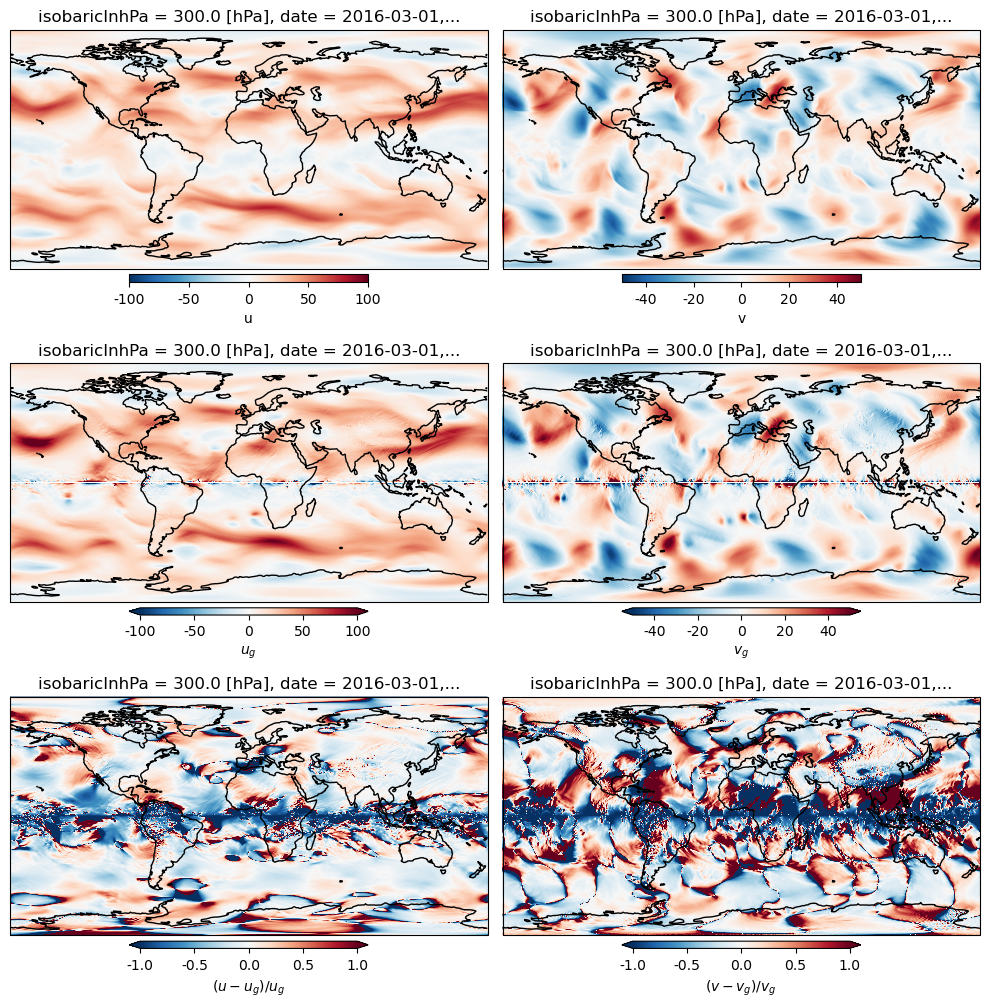

In [155]:
fig, ax = plt.subplots(nrows=3, ncols=2, 
                        sharey=True,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,10))

da_u_era5\
.plot(vmax=100, ax=ax[0,0], 
      cbar_kwargs=dict(orientation='horizontal', shrink=0.5, 
                       aspect=30, label='u', format='%.0f', pad=0.02)
     )
ax[0,0].coastlines(resolution='110m')

da_v_era5\
.plot(vmax=50, ax=ax[0,1], 
      cbar_kwargs=dict(orientation='horizontal', shrink=0.5, 
                       aspect=30, label='v', format='%.0f', pad=0.02)
     )
ax[0,1].coastlines(resolution='110m')

ug.plot(vmax=100, ax=ax[1,0], 
        cbar_kwargs=dict(orientation='horizontal', shrink=0.5, 
                       aspect=30, label='$u_g$', format='%.0f', pad=0.02)
       )
ax[1,0].coastlines(resolution='110m')


vg.plot(vmax=50, ax=ax[1,1], cbar_kwargs=dict(orientation='horizontal', shrink=0.5, 
                       aspect=30, label='$v_g$', format='%.0f', pad=0.02))
ax[1,1].coastlines(resolution='110m')
plt.tight_layout()

((da_u_era5-ug)/ug)\
.plot(vmax=1, ax=ax[2,0], 
      cbar_kwargs=dict(orientation='horizontal', shrink=0.5, 
                       aspect=30, label='($u-u_g$)/$u_g$', format='%.01f', pad=0.02)
     )
ax[2,0].coastlines(resolution='110m')

((da_v_era5-vg)/vg)\
.plot(vmax=1, ax=ax[2,1], 
      cbar_kwargs=dict(orientation='horizontal', shrink=0.5, 
                       aspect=30, label='($v-v_g$)/$v_g$', format='%.01f', pad=0.02)
     )
ax[2,1].coastlines(resolution='110m')



In [19]:
import windspharm

In [20]:
from windspharm.xarray import VectorWind
w = VectorWind(ds_u['u'], ds_v['v'])

In [21]:
uchiT13, vchiT13, upsiT13, vpsiT13 = w.helmholtz(truncation=13)

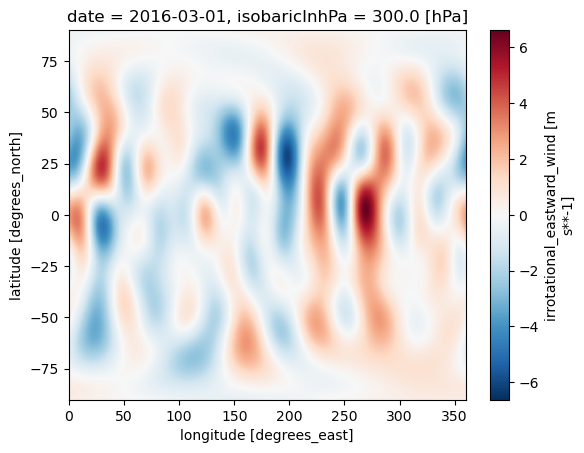

In [26]:
# w.magnitude()
uchiT13.sel(isobaricInhPa=300).isel(date=0).plot()

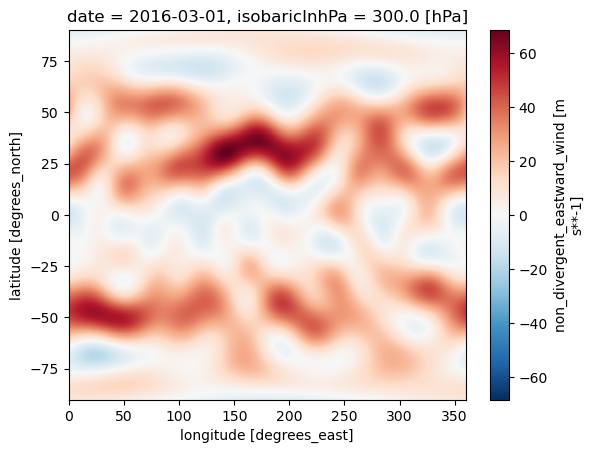

In [27]:
upsiT13.sel(isobaricInhPa=300).isel(date=0).plot()

In [72]:
os.chdir('/home/data/lab_hardik/daily_means/u_component_of_wind/')
u_files = [s for s in os.listdir() if any(t in s for t in ['2016_3','2016_4','2016_5','2016_6'])]
len(u_files)

In [79]:
ds_u = xr.open_mfdataset(u_files)\
.drop(['number','step']).compute()\
.metpy.parse_cf()


In [80]:
os.chdir('/home/data/lab_hardik/daily_means/v_component_of_wind/')
v_files = [s for s in os.listdir() if any(t in s for t in ['2016_3','2016_4','2016_5','2016_6'])]
len(v_files)

122

In [81]:
ds_v = xr.open_mfdataset(v_files)\
.drop(['number','step'])\
.metpy.parse_cf().compute()

In [82]:
os.chdir('/home/data/lab_hardik/daily_means/geopotential/')
z_files = [s for s in os.listdir() if any(t in s for t in ['2016_3','2016_4','2016_5','2016_6'])]
len(z_files)

122

In [83]:
ds_z = xr.open_mfdataset(z_files)\
.drop(['number','step'])\
.metpy.parse_cf().compute()

In [84]:
ds_u = ds_u.sel(date=slice(dt(2016,3,1), dt(2016,6,30)))
ds_v = ds_v.sel(date=slice(dt(2016,3,1), dt(2016,6,30)))
ds_z = ds_z.sel(date=slice(dt(2016,3,1), dt(2016,6,30)))


In [85]:
div_hor = mpcalc.divergence(ds_u['u']*units.meter/units.second, 
                            ds_v['v']*units.meter/units.second
                           )

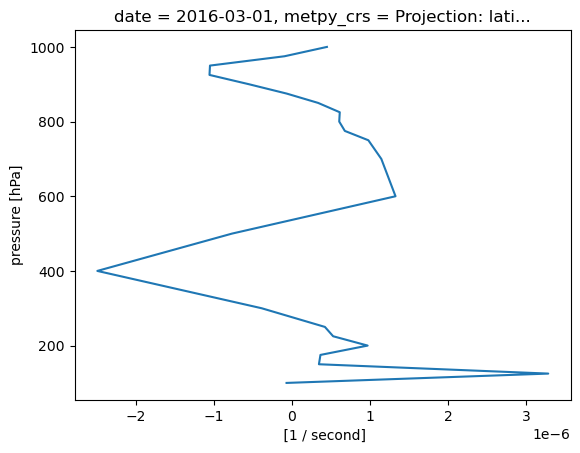

In [44]:
div_hor.isel(date=0)\
.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]))\
.mean(['latitude', 'longitude']).plot(y='isobaricInhPa')

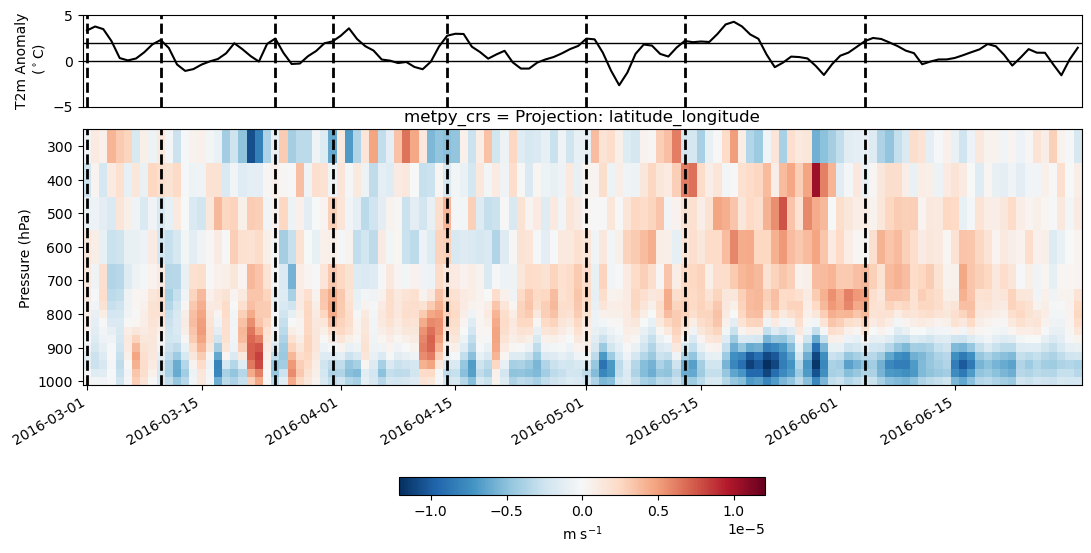

In [93]:
# Start with a square Figure
fig = plt.figure(figsize=(16,6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions
# Also adjust the subplot parameters for a square plot
gs = fig.add_gridspec(2, 2,  height_ratios=(1, 4), width_ratios=(4, 1),
                      left=0.1, right=0.9, 
                      bottom=0.1, top=0.9,
                      hspace=0.1, wspace=0.05)
# Create the Axes
ax = fig.add_subplot(gs[1,0])
ax_t2m = fig.add_subplot(gs[0,0], sharex=ax)

div_hor\
.sel(latitude=slice(nibox_lat[1], nibox_lat[0]), longitude=slice(nibox_lon[0], nibox_lon[1]), isobaricInhPa=slice(1000,300))\
.mean(['latitude', 'longitude'])\
.transpose()\
.plot(ax=ax, add_colorbar=True, cbar_kwargs=dict(orientation='horizontal', 
                                                 label='m $\mathregular{s^{-1}}$', 
                                                fraction=0.05, pad=0.25))
ax.invert_yaxis()
# (sp_plt_series/100)\
# .plot(ax=ax, color='black')

ax.set_ylabel('Pressure (hPa)')
ax.set_xlabel('')
# ax.axhline(500)
# ax.axhline(800)

(t2m_anom_series)\
.plot(ax=ax_t2m, color='black')
ax_t2m.set_ylim([-5,5])
ax_t2m.get_xaxis().set_visible(False)
ax_t2m.axhline(0, color='black', linewidth=1)
ax_t2m.axhline(2, color='black', linewidth=1)
ax_t2m.set_ylabel('T2m Anomaly\n ($^\circ$C)')

for dt in plt_dts:
    ax.axvline(
            dt, color='black', linewidth=2, linestyle='--'
    )
    ax_t2m.axvline(
            dt, color='black', linewidth=2, linestyle='--'
    )
# plt.savefig("/home/data/lab_hardik/daily_means/qg_omega/3d_w_2016.pdf", format="pdf", bbox_inches="tight")


In [94]:
arr = xr.DataArray([5, 6, 7], coords=[("x", [0, 1, 2])])

In [101]:
arr.pad({'x': (2,2)}, mode='wrap')

<xarray.DataArray (x: 7)>
array([6, 7, 5, 6, 7, 5, 6])
Coordinates:
  * x        (x) int64 1 2 0 1 2 0 1